# Part II - ( Prosper Loan Data Exploration )
## by (Abdurrahman Muhammad Tukur)

> 

## Investigation Overview

In this investigation, I wanted to look at the attributes of loans that could be used to predict their borrower APR. The main focus was on the Borrowers Apr, EmploymentStatus, Borrower's Prosper rating, LoanTerm, LoanOriginalAmount, StatedMonthly Income. 



## Dataset Overview

>> the dataset contains 113,937 rows and 81 columns that depict issued loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income etc. this data will be analyzed visually to generate insight

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')
prosper_loan.head()

prosper_loan_copy = prosper_loan.copy()

dropped_col = prosper_loan_copy.iloc[:, [4,2,6,7,8,9,14,15,47,16,17,18,19,36,59,63,64,67,71,80,5,21,13]]


In [5]:
dropped_col

,Term,ListingCreationDate,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,IncomeRange,ListingCategory (numeric),...,AmountDelinquent,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,LoanStatus,IsBorrowerHomeowner,ProsperRating (numeric)
0,36,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,"$25,000-49,999",0,...,472.0,0,9425,2007-09-12 00:00:00,330.43,-133.18,258,Completed,True,NaN
1,36,2014-02-27 08:28:07.900000000,NaN,0.12016,0.0920,0.0820,A,7.0,"$50,000-74,999",2,...,0.0,0,10000,2014-03-03 00:00:00,318.93,0.00,1,Current,False,6.0
2,36,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,Not displayed,0,...,NaN,0,3001,2007-01-17 00:00:00,123.32,-24.20,41,Completed,False,NaN
3,36,2012-10-22 11:02:35.010000000,NaN,0.12528,0.0974,0.0874,A,9.0,"$25,000-49,999",16,...,10056.0,0,10000,2012-11-01 00:00:00,321.45,-108.01,158,Current,True,6.0
4,36,2013-09-14 18:38:39.097000000,NaN,0.24614,0.2085,0.1985,D,4.0,"$100,000+",2,...,0.0,0,15000,2013-09-20 00:00:00,563.97,-60.27,20,Current,True,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,36,2013-04-14 05:55:02.663000000,NaN,0.22354,0.1864,0.1764,C,5.0,"$50,000-74,999",1,...,0.0,0,10000,2013-04-22 00:00:00,364.74,-75.58,1,Current,True,4.0
113933,36,2011-11-03 20:42:55.333000000,NaN,0.13220,0.1110,0.1010,A,8.0,"$75,000-99,999",7,...,5062.0,0,2000,2011-11-07 00:00:00,65.57,-30.05,22,FinalPaymentInProgress,True,6.0
113934,60,2013-12-13 05:49:12.703000000,NaN,0.23984,0.2150,0.2050,D,3.0,"$25,000-49,999",1,...,0.0,0,10000,2013-12-23 00:00:00,273.35,-16.91,119,Current,True,3.0
113935,60,2011-11-14 13:18:26.597000000,2013-08-13 00:00:00,0.28408,0.2605,0.2505,C,5.0,"$25,000-49,999",2,...,0.0,0,15000,2011-11-21 00:00:00,449.55,-235.05,274,Completed,True,4.0


## Prosper Score Distribution

According to the google sheet description of the prosper score it sets a risk score range from 1-10, and with the above visual its slightly normal distributed but 4, 6 and 8 appear to be the most frequent amongst the range of values.

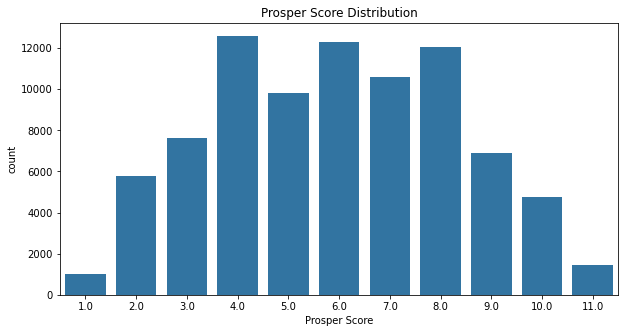

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data = dropped_col, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

## Borrower State Distribution

California, Texas and New York has the three biggest amount of loan.

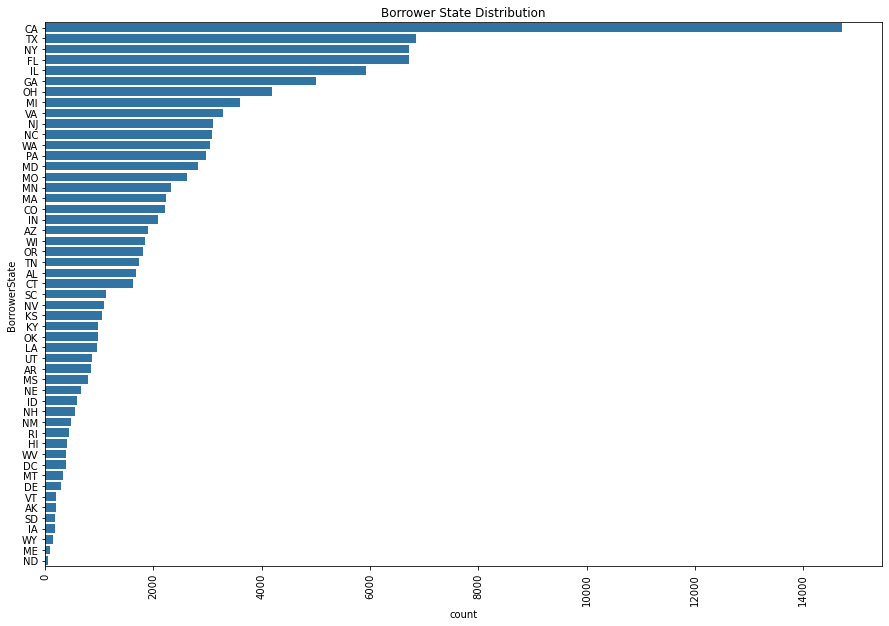

In [7]:
ordered_cat = dropped_col['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data = dropped_col,y='BorrowerState',color=base_color, order=ordered_cat);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

## Borrower Rate and Loan Term split by ProsperRating(Alpha)
usually short term loans would have higher rate and this goes for even creating an amortization table as well because with long rate the interest is compounded which in turn leads to a huge amount exponentially but wouldnt necessarily hurt so much to most people since its a very long time to pay up, there is usally small range of values spanned over a long time, that is when the loan term is long. but in this case i am seeing a lower rate for the short Term.

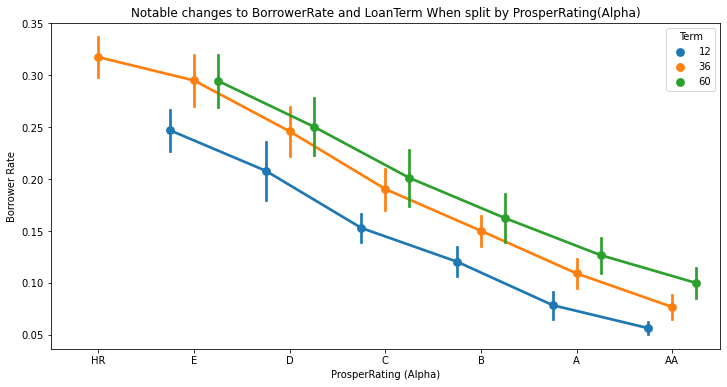

In [15]:
plt.figure(figsize=[12,6])

sb.pointplot(x ='ProsperRating (Alpha)', y ='BorrowerRate', hue = 'Term', data = dropped_col, palette = 'tab10', linestyle ='', 
             dodge = 0.5, ci ='sd')
plt.title('Notable changes to BorrowerRate and LoanTerm When split by ProsperRating(Alpha)')
plt.ylabel('Borrower Rate');

## BorrowerApr vs Loan Status
the current and completed loans have lower rate and mean than the Past_due loans except for the Past-due (16-30days) cancelled, Although at that point the difference is very little.

In [14]:
ordered_rating = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
categories = ordered_rating)
dropped_col['ProsperRating (Alpha)'] = dropped_col['ProsperRating (Alpha)'].astype(ordered_var)

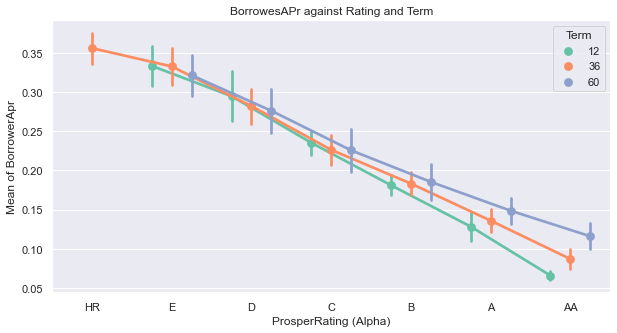

In [16]:
# Plotting BorrowersAprs against Rating Term
plt.figure(figsize=[10,5])
sb.set_theme(style="darkgrid")

sb.pointplot(x ='ProsperRating (Alpha)', y ='BorrowerAPR', hue = 'Term', data = dropped_col, palette = 'Set2', linestyle ='', 
             dodge = 0.5, ci ='sd')
plt.title('BorrowesAPr against Rating and Term')
plt.ylabel('Mean of BorrowerApr');

# LenderYield vs Borrower APR  vs ProsperRating
Here it is very clear that the plot depicts a positive relationship between the 2 variables BorrowerApr and LenderYield, this correlation shows that when the borrowers of the loan pays, the lenderyield increases but the higher the prosper score the lower the borrowerapr and lenderyield.

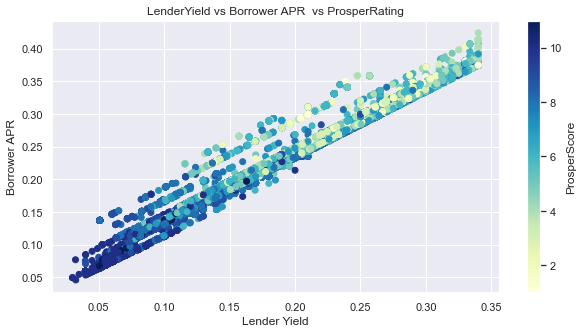

In [17]:
plt.figure(figsize = [10, 5])
plt.scatter(data = dropped_col,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'YlGnBu')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template_completed.ipynb --to slides --post serve --no-input --no-prompt